# Numeric - Polynomial Features Model

## Environment

In [67]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn as sns
sns.set(rc={"figure.figsize":(25, 15)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.6g}'.format)

from scipy import stats
from scipy.stats import t

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.inspection import permutation_importance

from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures

## Numeric - Target Tansform Model

**Numeric Target Transform MODEL:**
    
    - Dataset: DF Numeric + REviews + FEature Enginneering
    - Target Transform
    - Train Test Split 80/20
    - NaN Imputer - Median
    - Linear Regression - sklearn
    - Métricas: MAE, RMSE, R2

### Dataset (DF Numeric No Reviews No Feature Engineering)

In [68]:
df = pd.read_csv("data/airbnb-numeric.csv")

In [69]:
df.columns

Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Reviews per Month', 'Security Deposit',
       'Cleaning Fee', 'Calculated host listings count',
       'Num_Host_Verifications', 'Name_Len', 'Summary_Len', 'Space_Len',
       'Description_Len', 'Summary_Lang', 'is_Thumbnail', 'is_HostAbout',
       'is_ResponseInHours', 'is_EntireHome', 'is_Bed', 'is_UpdatedToday',
       'Price'],
      dtype='object')

In [70]:
selected_cols = ['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Reviews per Month', 'Security Deposit',
       'Cleaning Fee', 'Calculated host listings count',
       'Num_Host_Verifications', 'Name_Len', 'Summary_Len', 'Space_Len',
       'Description_Len', 'Summary_Lang', 'is_Thumbnail', 'is_HostAbout',
       'is_ResponseInHours', 'is_EntireHome', 'is_Bed', 'is_UpdatedToday',
       'Price']

In [71]:
df = df[selected_cols]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13115 entries, 0 to 13114
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        13115 non-null  float64
 1   Longitude                       13115 non-null  float64
 2   Accommodates                    13115 non-null  int64  
 3   Bathrooms                       13115 non-null  float64
 4   Bedrooms                        13115 non-null  float64
 5   Beds                            13115 non-null  float64
 6   Guests Included                 13115 non-null  int64  
 7   Extra People                    13115 non-null  int64  
 8   Minimum Nights                  13115 non-null  int64  
 9   Availability 30                 13115 non-null  int64  
 10  Availability 365                13115 non-null  int64  
 11  Number of Reviews               13115 non-null  int64  
 12  Review Scores Rating            

In [73]:
df.shape

(13115, 34)

In [74]:
df.isnull().sum().sum()

16758

Hay 13.115 filas, 27 columnas y 0 NaN

### Train Test Split

In [75]:
target = 'Price'
X = df.drop(target, axis=1)
y = df[target]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### NaN Imputation

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10492 entries, 4003 to 7270
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        10492 non-null  float64
 1   Longitude                       10492 non-null  float64
 2   Accommodates                    10492 non-null  int64  
 3   Bathrooms                       10492 non-null  float64
 4   Bedrooms                        10492 non-null  float64
 5   Beds                            10492 non-null  float64
 6   Guests Included                 10492 non-null  int64  
 7   Extra People                    10492 non-null  int64  
 8   Minimum Nights                  10492 non-null  int64  
 9   Availability 30                 10492 non-null  int64  
 10  Availability 365                10492 non-null  int64  
 11  Number of Reviews               10492 non-null  int64  
 12  Review Scores Rating          

In [78]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2623 entries, 12658 to 12427
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        2623 non-null   float64
 1   Longitude                       2623 non-null   float64
 2   Accommodates                    2623 non-null   int64  
 3   Bathrooms                       2623 non-null   float64
 4   Bedrooms                        2623 non-null   float64
 5   Beds                            2623 non-null   float64
 6   Guests Included                 2623 non-null   int64  
 7   Extra People                    2623 non-null   int64  
 8   Minimum Nights                  2623 non-null   int64  
 9   Availability 30                 2623 non-null   int64  
 10  Availability 365                2623 non-null   int64  
 11  Number of Reviews               2623 non-null   int64  
 12  Review Scores Rating         

#### Median

In [79]:
X_train.median()

Latitude                          40.4186
Longitude                        -3.70159
Accommodates                            2
Bathrooms                               1
Bedrooms                                1
Beds                                    1
Guests Included                         1
Extra People                            0
Minimum Nights                          2
Availability 30                         6
Availability 365                      245
Number of Reviews                       8
Review Scores Rating                   94
Review Scores Cleanliness              10
Review Scores Checkin                  10
Review Scores Communication            10
Review Scores Location                 10
Reviews per Month                    1.29
Security Deposit                        0
Cleaning Fee                           10
Calculated host listings count          2
Num_Host_Verifications                  4
Name_Len                               33
Summary_Len                       

In [80]:
X_train = X_train.fillna(X_train.median())

In [81]:
X_test = X_test.fillna(X_train.median()) #X_train Median for Data Leak

In [82]:
X_train.isnull().sum().sum()

0

In [83]:
X_test.isnull().sum().sum()

0

### Polynomial Features

In [84]:
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)

In [85]:
X_train_poly = poly.fit_transform(X_train)

In [86]:
polynomial_column_names = poly.get_feature_names_out(input_features = X_train.columns)

In [87]:
X_train_poly = pd.DataFrame(data = X_train_poly, columns = polynomial_column_names )
X_train_poly.columns = X_train_poly.columns.str.replace(' ', '_', regex=True)
X_train_poly.columns = X_train_poly.columns.str.replace('^', '_',regex=True)

In [88]:
X_test_poly = poly.transform(X_test)

In [89]:
X_test_poly = poly.transform(X_test)
X_test_poly = pd.DataFrame(data = X_test_poly, columns = polynomial_column_names )
X_test_poly.columns = X_test_poly.columns.str.replace(' ', '_', regex=True)
X_test_poly.columns = X_test_poly.columns.str.replace('^', '_',regex=True)

In [90]:
X_train = X_train_poly
X_test = X_test_poly

In [102]:
X_train.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests_Included,Extra_People,Minimum_Nights,Availability_30,Availability_365,Number_of_Reviews,Review_Scores_Rating,Review_Scores_Cleanliness,Review_Scores_Checkin,Review_Scores_Communication,Review_Scores_Location,Reviews_per_Month,Security_Deposit,Cleaning_Fee,Calculated_host_listings_count,Num_Host_Verifications,Name_Len,Summary_Len,Space_Len,Description_Len,Summary_Lang,is_Thumbnail,is_HostAbout,is_ResponseInHours,is_EntireHome,is_Bed,is_UpdatedToday,Latitude_2,Latitude_Longitude,Latitude_Accommodates,Latitude_Bathrooms,Latitude_Bedrooms,Latitude_Beds,Latitude_Guests_Included,Latitude_Extra_People,Latitude_Minimum_Nights,Latitude_Availability_30,Latitude_Availability_365,Latitude_Number_of_Reviews,Latitude_Review_Scores_Rating,Latitude_Review_Scores_Cleanliness,Latitude_Review_Scores_Checkin,Latitude_Review_Scores_Communication,Latitude_Review_Scores_Location,Latitude_Reviews_per_Month,Latitude_Security_Deposit,Latitude_Cleaning_Fee,Latitude_Calculated_host_listings_count,Latitude_Num_Host_Verifications,Latitude_Name_Len,Latitude_Summary_Len,Latitude_Space_Len,Latitude_Description_Len,Latitude_Summary_Lang,Latitude_is_Thumbnail,Latitude_is_HostAbout,Latitude_is_ResponseInHours,Latitude_is_EntireHome,Latitude_is_Bed,Latitude_is_UpdatedToday,Longitude_2,Longitude_Accommodates,Longitude_Bathrooms,Longitude_Bedrooms,Longitude_Beds,Longitude_Guests_Included,Longitude_Extra_People,Longitude_Minimum_Nights,Longitude_Availability_30,Longitude_Availability_365,Longitude_Number_of_Reviews,Longitude_Review_Scores_Rating,Longitude_Review_Scores_Cleanliness,Longitude_Review_Scores_Checkin,Longitude_Review_Scores_Communication,Longitude_Review_Scores_Location,Longitude_Reviews_per_Month,Longitude_Security_Deposit,Longitude_Cleaning_Fee,Longitude_Calculated_host_listings_count,Longitude_Num_Host_Verifications,Longitude_Name_Len,Longitude_Summary_Len,Longitude_Space_Len,Longitude_Description_Len,Longitude_Summary_Lang,Longitude_is_Thumbnail,Longitude_is_HostAbout,Longitude_is_ResponseInHours,Longitude_is_EntireHome,Longitude_is_Bed,Longitude_is_UpdatedToday,Accommodates_2,Accommodates_Bathrooms,Accommodates_Bedrooms,Accommodates_Beds,Accommodates_Guests_Included,Accommodates_Extra_People,Accommodates_Minimum_Nights,Accommodates_Availability_30,Accommodates_Availability_365,Accommodates_Number_of_Reviews,Accommodates_Review_Scores_Rating,Accommodates_Review_Scores_Cleanliness,Accommodates_Review_Scores_Checkin,Accommodates_Review_Scores_Communication,Accommodates_Review_Scores_Location,Accommodates_Reviews_per_Month,Accommodates_Security_Deposit,Accommodates_Cleaning_Fee,Accommodates_Calculated_host_listings_count,Accommodates_Num_Host_Verifications,Accommodates_Name_Len,Accommodates_Summary_Len,Accommodates_Space_Len,Accommodates_Description_Len,Accommodates_Summary_Lang,Accommodates_is_Thumbnail,Accommodates_is_HostAbout,Accommodates_is_ResponseInHours,Accommodates_is_EntireHome,Accommodates_is_Bed,Accommodates_is_UpdatedToday,Bathrooms_2,Bathrooms_Bedrooms,Bathrooms_Beds,Bathrooms_Guests_Included,Bathrooms_Extra_People,Bathrooms_Minimum_Nights,Bathrooms_Availability_30,Bathrooms_Availability_365,Bathrooms_Number_of_Reviews,Bathrooms_Review_Scores_Rating,Bathrooms_Review_Scores_Cleanliness,Bathrooms_Review_Scores_Checkin,Bathrooms_Review_Scores_Communication,Bathrooms_Review_Scores_Location,Bathrooms_Reviews_per_Month,Bathrooms_Security_Deposit,Bathrooms_Cleaning_Fee,Bathrooms_Calculated_host_listings_count,Bathrooms_Num_Host_Verifications,Bathrooms_Name_Len,Bathrooms_Summary_Len,Bathrooms_Space_Len,Bathrooms_Description_Len,Bathrooms_Summary_Lang,Bathrooms_is_Thumbnail,Bathrooms_is_HostAbout,Bathrooms_is_ResponseInHours,Bathrooms_is_EntireHome,Bathrooms_is_Bed,Bathrooms_is_UpdatedToday,Bedrooms_2,Bedrooms_Beds,Bedrooms_Guests_Included,Bedrooms_Extra_People,Bedrooms_Minimum_Nights,Bedrooms_Availability_30,Bedrooms_Availability_365,Bedrooms_Number_of_Reviews,Bedrooms_Review_Scores_R

In [103]:
X_test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests_Included,Extra_People,Minimum_Nights,Availability_30,Availability_365,Number_of_Reviews,Review_Scores_Rating,Review_Scores_Cleanliness,Review_Scores_Checkin,Review_Scores_Communication,Review_Scores_Location,Reviews_per_Month,Security_Deposit,Cleaning_Fee,Calculated_host_listings_count,Num_Host_Verifications,Name_Len,Summary_Len,Space_Len,Description_Len,Summary_Lang,is_Thumbnail,is_HostAbout,is_ResponseInHours,is_EntireHome,is_Bed,is_UpdatedToday,Latitude_2,Latitude_Longitude,Latitude_Accommodates,Latitude_Bathrooms,Latitude_Bedrooms,Latitude_Beds,Latitude_Guests_Included,Latitude_Extra_People,Latitude_Minimum_Nights,Latitude_Availability_30,Latitude_Availability_365,Latitude_Number_of_Reviews,Latitude_Review_Scores_Rating,Latitude_Review_Scores_Cleanliness,Latitude_Review_Scores_Checkin,Latitude_Review_Scores_Communication,Latitude_Review_Scores_Location,Latitude_Reviews_per_Month,Latitude_Security_Deposit,Latitude_Cleaning_Fee,Latitude_Calculated_host_listings_count,Latitude_Num_Host_Verifications,Latitude_Name_Len,Latitude_Summary_Len,Latitude_Space_Len,Latitude_Description_Len,Latitude_Summary_Lang,Latitude_is_Thumbnail,Latitude_is_HostAbout,Latitude_is_ResponseInHours,Latitude_is_EntireHome,Latitude_is_Bed,Latitude_is_UpdatedToday,Longitude_2,Longitude_Accommodates,Longitude_Bathrooms,Longitude_Bedrooms,Longitude_Beds,Longitude_Guests_Included,Longitude_Extra_People,Longitude_Minimum_Nights,Longitude_Availability_30,Longitude_Availability_365,Longitude_Number_of_Reviews,Longitude_Review_Scores_Rating,Longitude_Review_Scores_Cleanliness,Longitude_Review_Scores_Checkin,Longitude_Review_Scores_Communication,Longitude_Review_Scores_Location,Longitude_Reviews_per_Month,Longitude_Security_Deposit,Longitude_Cleaning_Fee,Longitude_Calculated_host_listings_count,Longitude_Num_Host_Verifications,Longitude_Name_Len,Longitude_Summary_Len,Longitude_Space_Len,Longitude_Description_Len,Longitude_Summary_Lang,Longitude_is_Thumbnail,Longitude_is_HostAbout,Longitude_is_ResponseInHours,Longitude_is_EntireHome,Longitude_is_Bed,Longitude_is_UpdatedToday,Accommodates_2,Accommodates_Bathrooms,Accommodates_Bedrooms,Accommodates_Beds,Accommodates_Guests_Included,Accommodates_Extra_People,Accommodates_Minimum_Nights,Accommodates_Availability_30,Accommodates_Availability_365,Accommodates_Number_of_Reviews,Accommodates_Review_Scores_Rating,Accommodates_Review_Scores_Cleanliness,Accommodates_Review_Scores_Checkin,Accommodates_Review_Scores_Communication,Accommodates_Review_Scores_Location,Accommodates_Reviews_per_Month,Accommodates_Security_Deposit,Accommodates_Cleaning_Fee,Accommodates_Calculated_host_listings_count,Accommodates_Num_Host_Verifications,Accommodates_Name_Len,Accommodates_Summary_Len,Accommodates_Space_Len,Accommodates_Description_Len,Accommodates_Summary_Lang,Accommodates_is_Thumbnail,Accommodates_is_HostAbout,Accommodates_is_ResponseInHours,Accommodates_is_EntireHome,Accommodates_is_Bed,Accommodates_is_UpdatedToday,Bathrooms_2,Bathrooms_Bedrooms,Bathrooms_Beds,Bathrooms_Guests_Included,Bathrooms_Extra_People,Bathrooms_Minimum_Nights,Bathrooms_Availability_30,Bathrooms_Availability_365,Bathrooms_Number_of_Reviews,Bathrooms_Review_Scores_Rating,Bathrooms_Review_Scores_Cleanliness,Bathrooms_Review_Scores_Checkin,Bathrooms_Review_Scores_Communication,Bathrooms_Review_Scores_Location,Bathrooms_Reviews_per_Month,Bathrooms_Security_Deposit,Bathrooms_Cleaning_Fee,Bathrooms_Calculated_host_listings_count,Bathrooms_Num_Host_Verifications,Bathrooms_Name_Len,Bathrooms_Summary_Len,Bathrooms_Space_Len,Bathrooms_Description_Len,Bathrooms_Summary_Lang,Bathrooms_is_Thumbnail,Bathrooms_is_HostAbout,Bathrooms_is_ResponseInHours,Bathrooms_is_EntireHome,Bathrooms_is_Bed,Bathrooms_is_UpdatedToday,Bedrooms_2,Bedrooms_Beds,Bedrooms_Guests_Included,Bedrooms_Extra_People,Bedrooms_Minimum_Nights,Bedrooms_Availability_30,Bedrooms_Availability_365,Bedrooms_Number_of_Reviews,Bedrooms_Review_Scores_R

### Sklearn Linear Regression

In [104]:
model = LinearRegression()

In [105]:
model.fit(X_train, y_train)

LinearRegression()

In [106]:
X_pred = model.predict(X_train)

In [107]:
y_pred = model.predict(X_test)

### Results

In [108]:
train = ['Train Num FE Rev',
            round(mean_absolute_error(y_train, X_pred),2),
            round(mean_squared_error(y_train, X_pred, squared=False),2),
            round(r2_score(y_train, X_pred),3)]

test = ['Test Num FE Rev',
           round(mean_absolute_error(y_test, y_pred),2),
           round(mean_squared_error(y_test, y_pred, squared=False),2),
           round(r2_score(y_test, y_pred),3)]

results = pd.DataFrame([train, test])
results.columns=['Model','MAE', 'RMSE','R2']

In [109]:
results

,Model,MAE,RMSE,R2
0,Train Num FE Rev,17.83,31.34,0.694
1,Test Num FE Rev,18.76,32.26,0.633


In [115]:
mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("MEAN CV MAE: %.3f" %round(abs(mae_scores.mean()),2))

MEAN CV MAE: 19.970


In [116]:
rmse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("MEAN CV RMSE: %.3f" %round(abs(rmse_scores.mean()),2))

MEAN CV RMSE: 36.480


In [117]:
r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("MEAN CV MAE: %.3f" %round(abs(r2_scores.mean()),2))

MEAN CV MAE: 0.580


### Residuals

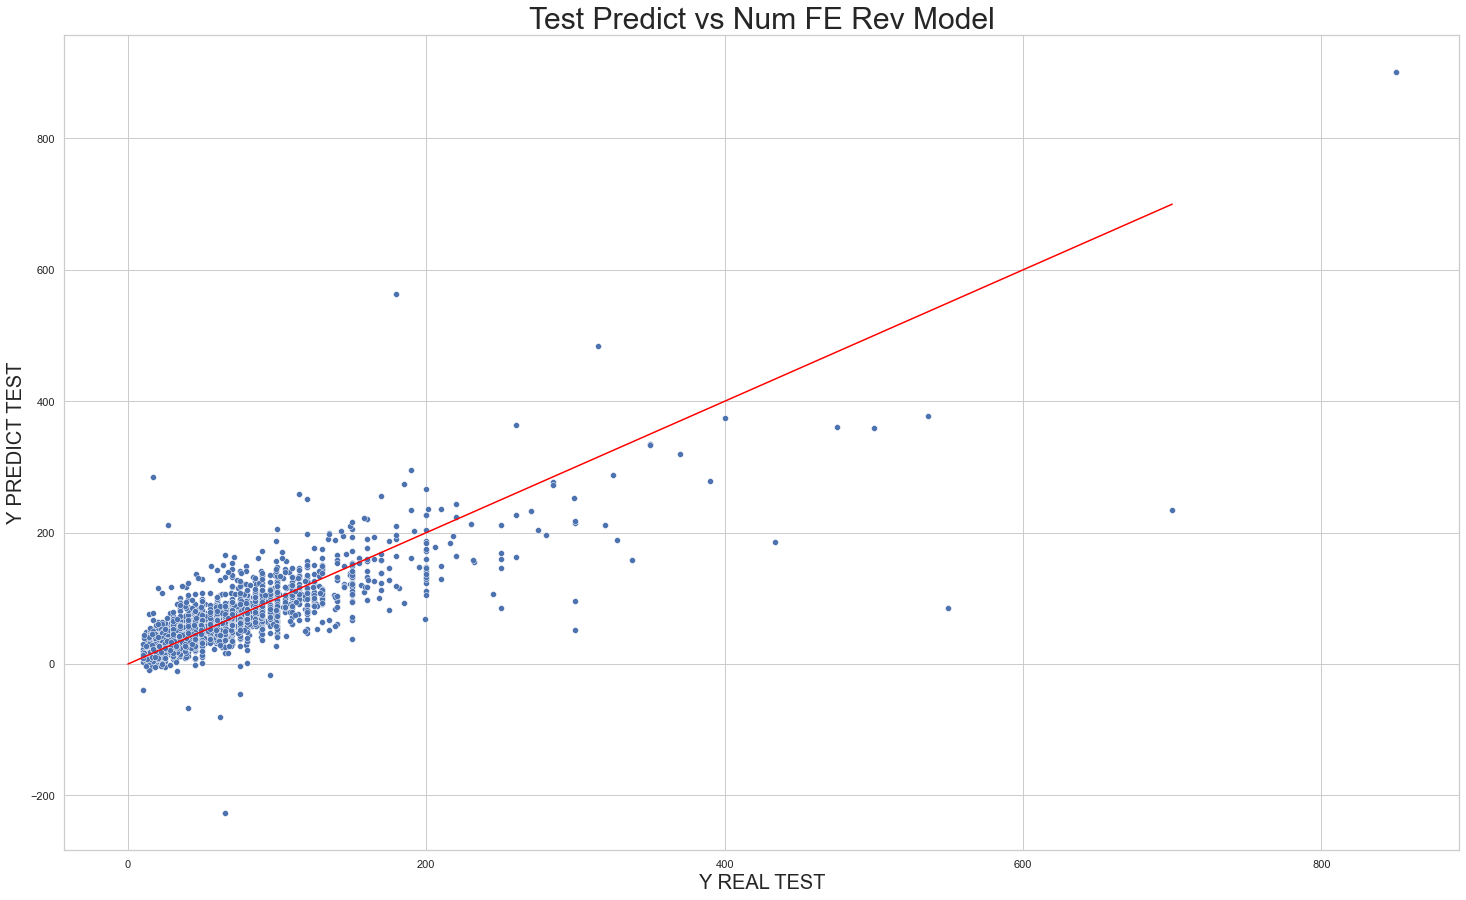

In [118]:
sns.scatterplot(y=y_pred, x=y_test)
sns.lineplot(x=[0,700], y=[0,700], color='red')
plt.title("Test Predict vs Num FE Rev Model", size=30)
plt.xlabel('Y REAL TEST', size=20)
plt.ylabel('Y PREDICT TEST', size=20)
plt.show()

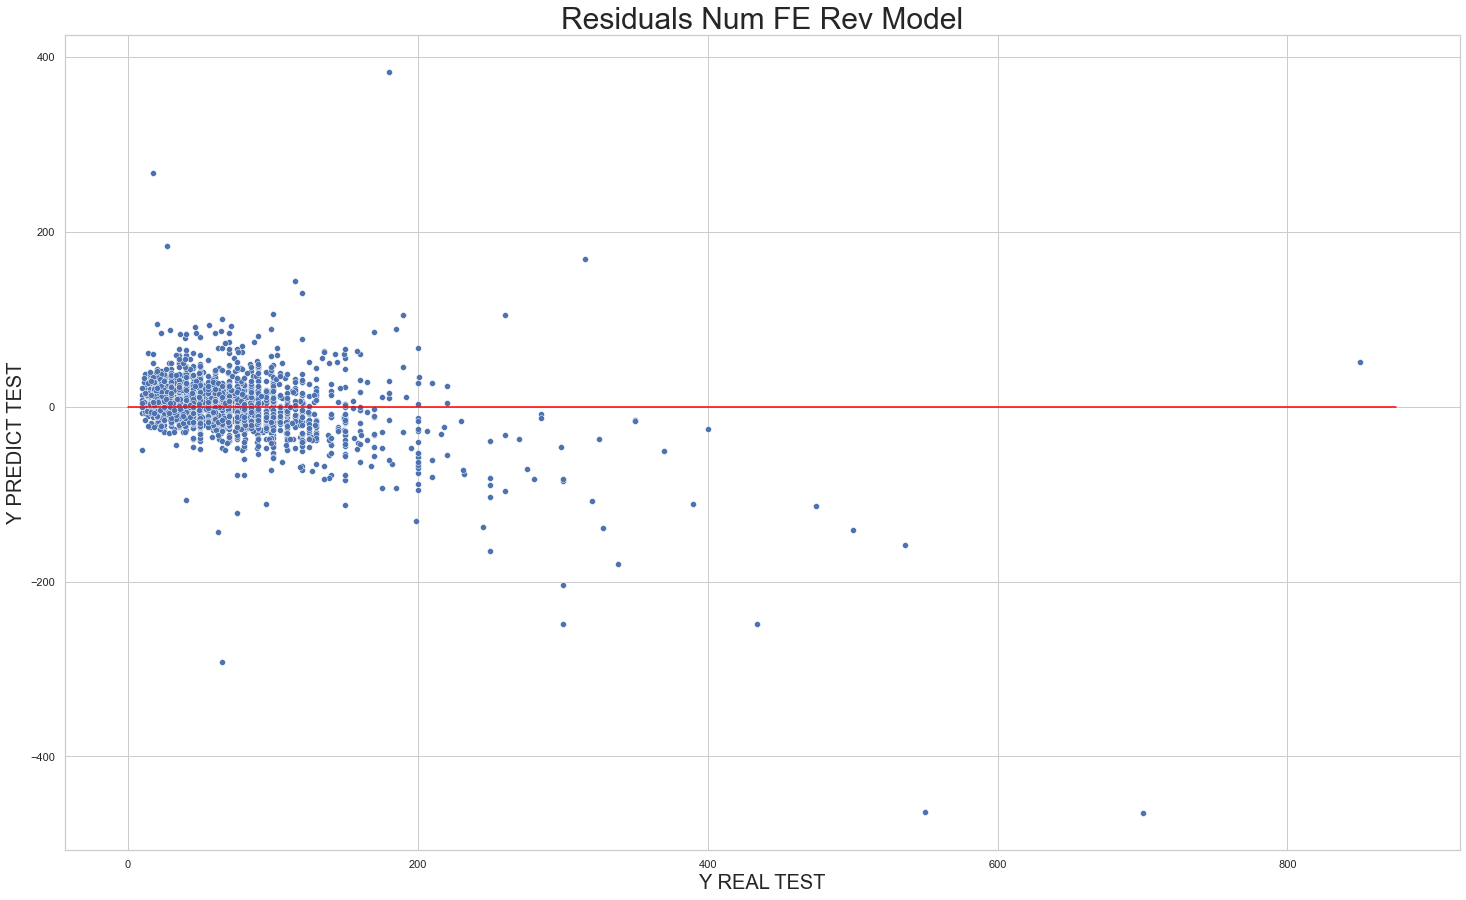

In [119]:
diff = y_pred - y_test
sns.scatterplot(y=diff, x=y_test)
sns.lineplot(x=[0,875], y=[0,0], color='red')
plt.title("Residuals Num FE Rev Model", size=30)
plt.xlabel('Y REAL TEST', size=20)
plt.ylabel('Y PREDICT TEST', size=20)
plt.show()

HAy más dificultad en predecir los precios altos

### Permutarion Importance

In [129]:
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=2,random_state=42)

In [130]:
sorted_idx = perm_importance.importances_mean.argsort()

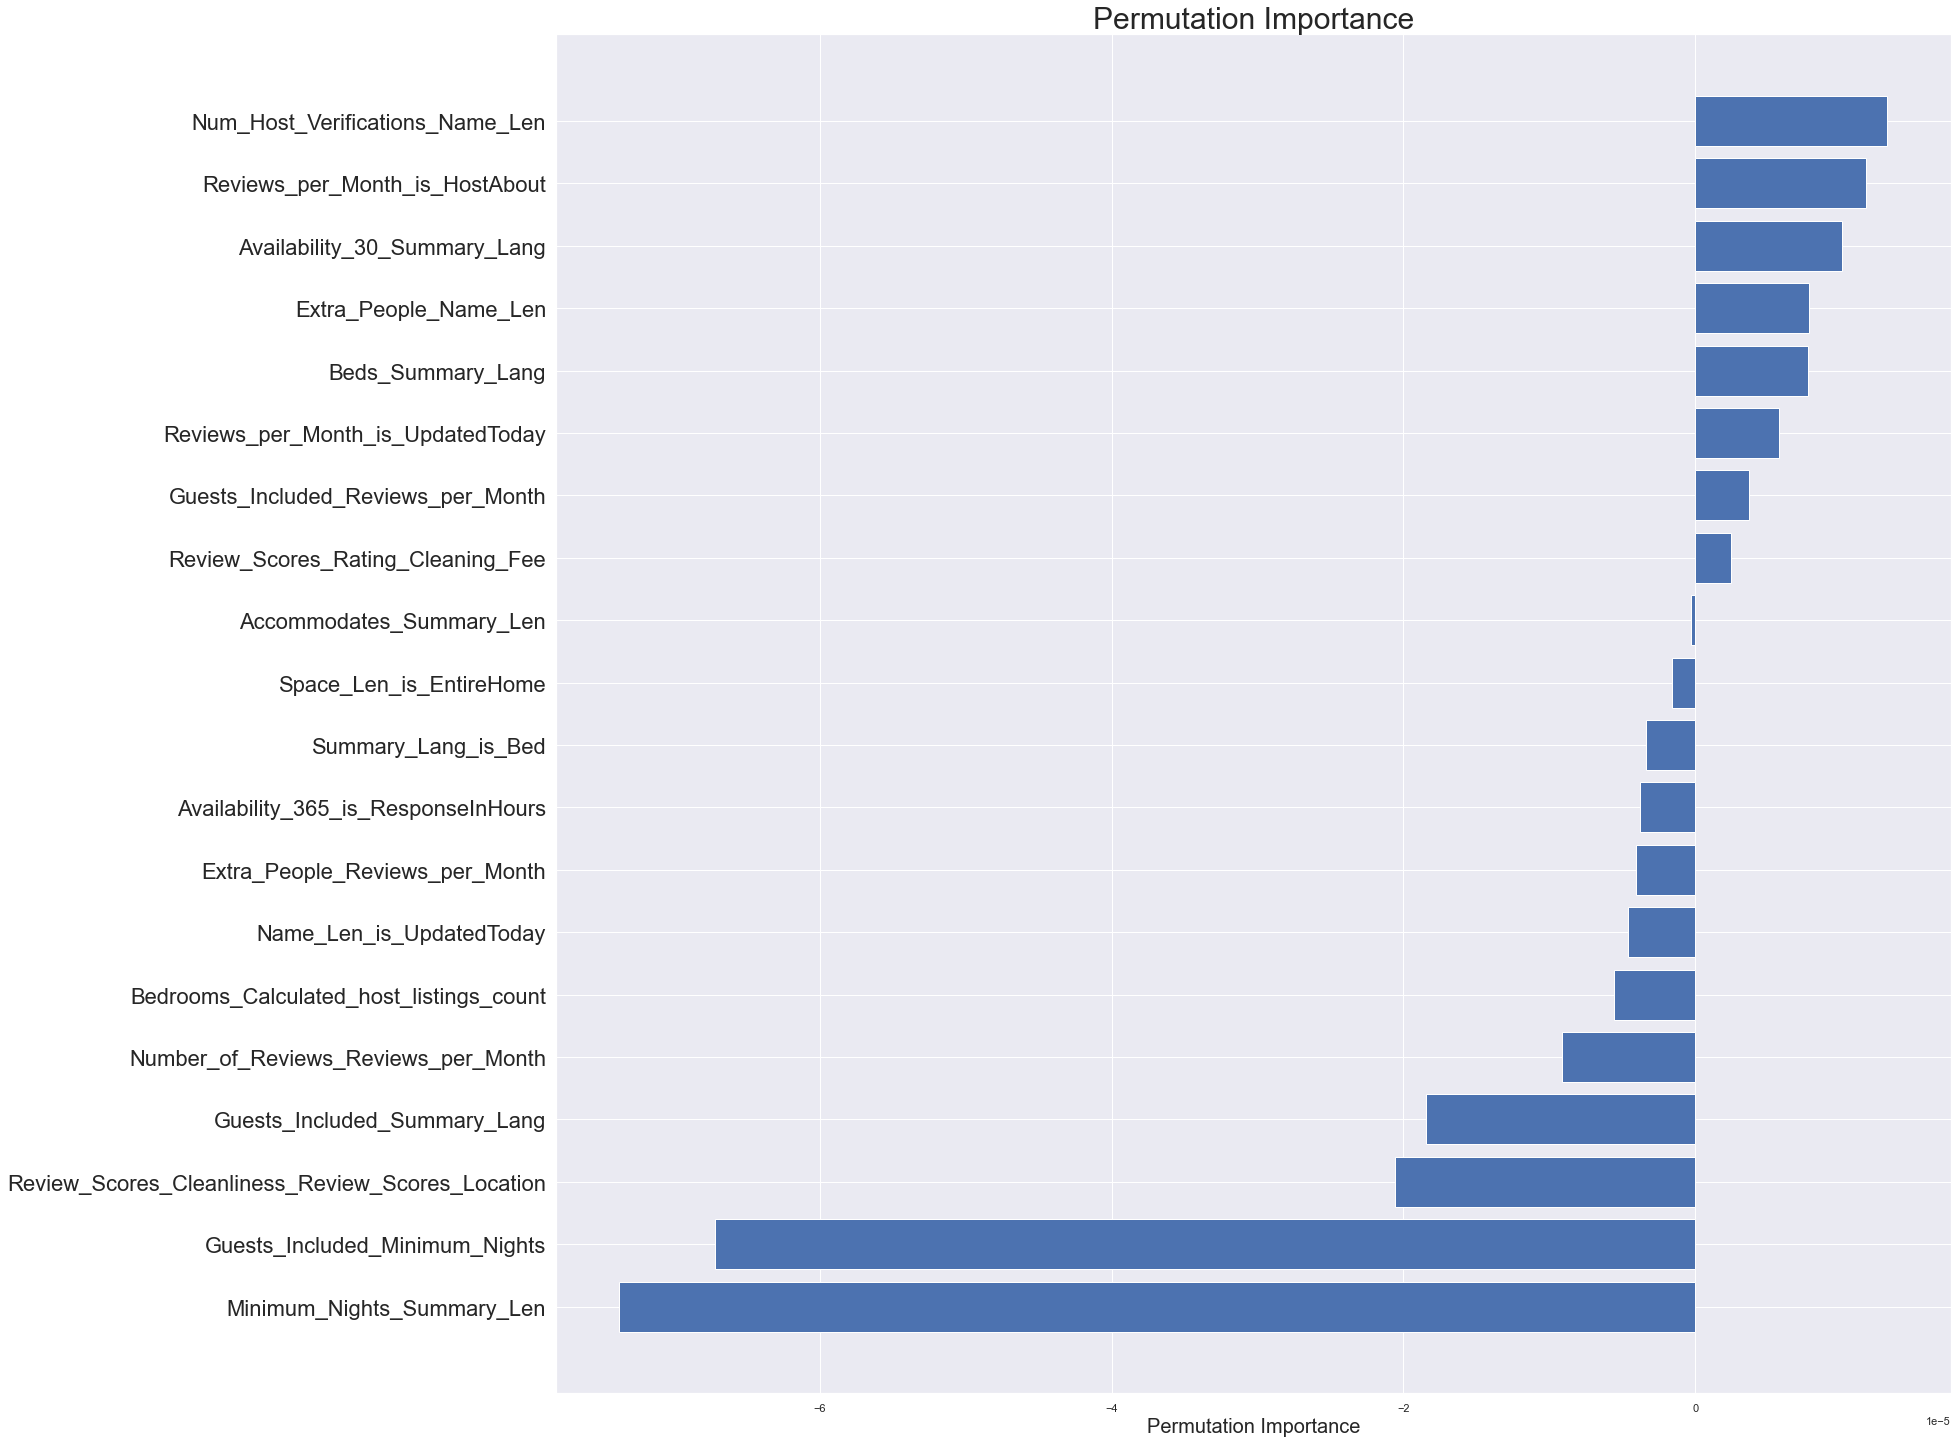

In [135]:
sns.set(rc={"figure.figsize":(25, 25)})
plt.barh(X.columns[sorted_idx][0:20], perm_importance.importances_mean[sorted_idx][0:20])
plt.xlabel("Permutation Importance", size=20)
plt.title('Permutation Importance', size= 30)
plt.yticks(size=22)
plt.show()